# Linear regression
The goal of regression is to perform predictions of continuous values using a trained model. We want to find a relationship between one or multiple features and a specific output variable we call 'y'. 

This relationship is a multidimensional curve in the shape of $y=\theta_nX_n+...\theta_1X_1+\theta_0$. The vector X is the set of features and the set $\theta$ are called the parameters.

The goals of this exercise are:
* Read in data and process it using the pandas library
* Perform simple statistic analyses on the data to detect inconsistencies of the data and see correlations between features and/or target
* Correctly splitting data in a training and test set
* The ability to normalize data
* Training a regression model
* Evaluating a regression model
* Detect over- and underfitting
* Apply L1 and L2 regularisation to prevent over- and underfitting


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt                                             # To create plots
import seaborn as sns                                                       # Make seaborn plots
import numpy as np                                                          # To perform calculations quickly
import pandas as pd                                                         # To load in and manipulate data
from sklearn.linear_model import LinearRegression, Lasso, Ridge             # Built in datasets and linear models
from sklearn.model_selection import train_test_split                        # Splitting in train and test set
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # Metrics used to test the model
from sklearn.metrics import roc_curve                                       # Used to create ROC_curve
from sklearn.preprocessing import PolynomialFeatures                        # Used to construct higher order features
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler # Different scalers that can be used

## Life expectancy
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website.

More information: https://www.kaggle.com/augustus0498/life-expectancy-who

**Metadata**
* Country - Country
* Year - Year
* Status - Developed or Developing status
* Lifeexpectancy - Life Expectancy in age
* AdultMortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infantdeaths - Number of Infant Deaths per 1000 population
* Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* percentageexpenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* HepatitisB - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles - Measles - number of reported cases per 1000 population
* BMI - Average Body Mass Index of entire population
* under-fivedeaths - Number of under-five deaths per 1000 population
* Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)
* Totalexpenditure - General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP - Gross Domestic Product per capita (in USD)
* Population - Population of the country
* thinness1-19years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* thinness5-9years - Prevalence of thinness among children for Age 5 to 9(%)
* Incomecompositionofresources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling - Number of years of Schooling(years)

In [2]:
# Read the dataset from csv
data = pd.read_csv("/home/guest/MachineLearning/exercises/data/led.csv")
# Show first 10 rows of the dataframe
data.head(10)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
# Show the number of rows and columns in the df (the shape of the df)
print(data.shape)
# Summarize the dataframe (describe)
data.describe()

(2938, 22)


,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [4]:
# Due to a lot of missing data in the Population column, we will remove this column
data.drop("Population",axis=1,inplace=True)
# Also remove the Country column
data.drop("Country", axis=1, inplace=True)

data.head(10)

,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
5,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,18.4,18.4,0.448,9.2
6,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,18.6,18.7,0.434,8.9
7,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,18.8,18.9,0.433,8.7
8,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,19.0,19.1,0.415,8.4
9,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,19.2,19.3,0.405,8.1


In [5]:
# Remove all rows with NA values (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
data_without_na = data.dropna()
# Take a new look at the shape of the df (to see if/how many rows were removed)
print(data_without_na.shape)

print(f"numbers of rows that have been removed {data.shape[0]-data_without_na.shape[0]}")

(1853, 20)
numbers of rows that have been removed 1085


In [6]:
# Renaming the data_without_na for convenience
data = data_without_na
# Take a look at all possible values of the status column
# Hint: use the "unique" function from pandas 
pd.unique(data["Status"])

array(['Developing', 'Developed'], dtype=object)

In [7]:
# Based on the information above: replace the possible values with 0 and 1
# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# Take a look at dict-like replacement
data = data.replace({'Status':{'Developing':0, 'Developed':1}})
data.head(10)

/tmp/ipykernel_17041/674655199.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Status':{'Developing':0, 'Developed':1}})


,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
5,2010,0,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,18.4,18.4,0.448,9.2
6,2009,0,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,18.6,18.7,0.434,8.9
7,2008,0,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,18.8,18.9,0.433,8.7
8,2007,0,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,19.0,19.1,0.415,8.4
9,2006,0,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,19.2,19.3,0.405,8.1


In [8]:
# Remove outliers based on the zscore
# zscore gives you the number of standard deviations difference between the value and the mean value of the column
# In this example: remove outliers that are more than 5 standard deviations (z-score > 5) from the mean

# Use the following function to determine the zscore for each value
from scipy.stats import zscore

# Remove the outliers (example code)
data_no_outliers = data[(zscore(data)<=5).all(axis=1)]

# Take a look at the new shape of the dataframe
data_no_outliers.shape

# Overwriting the data without the ouliers
data = data_no_outliers

<Axes: >

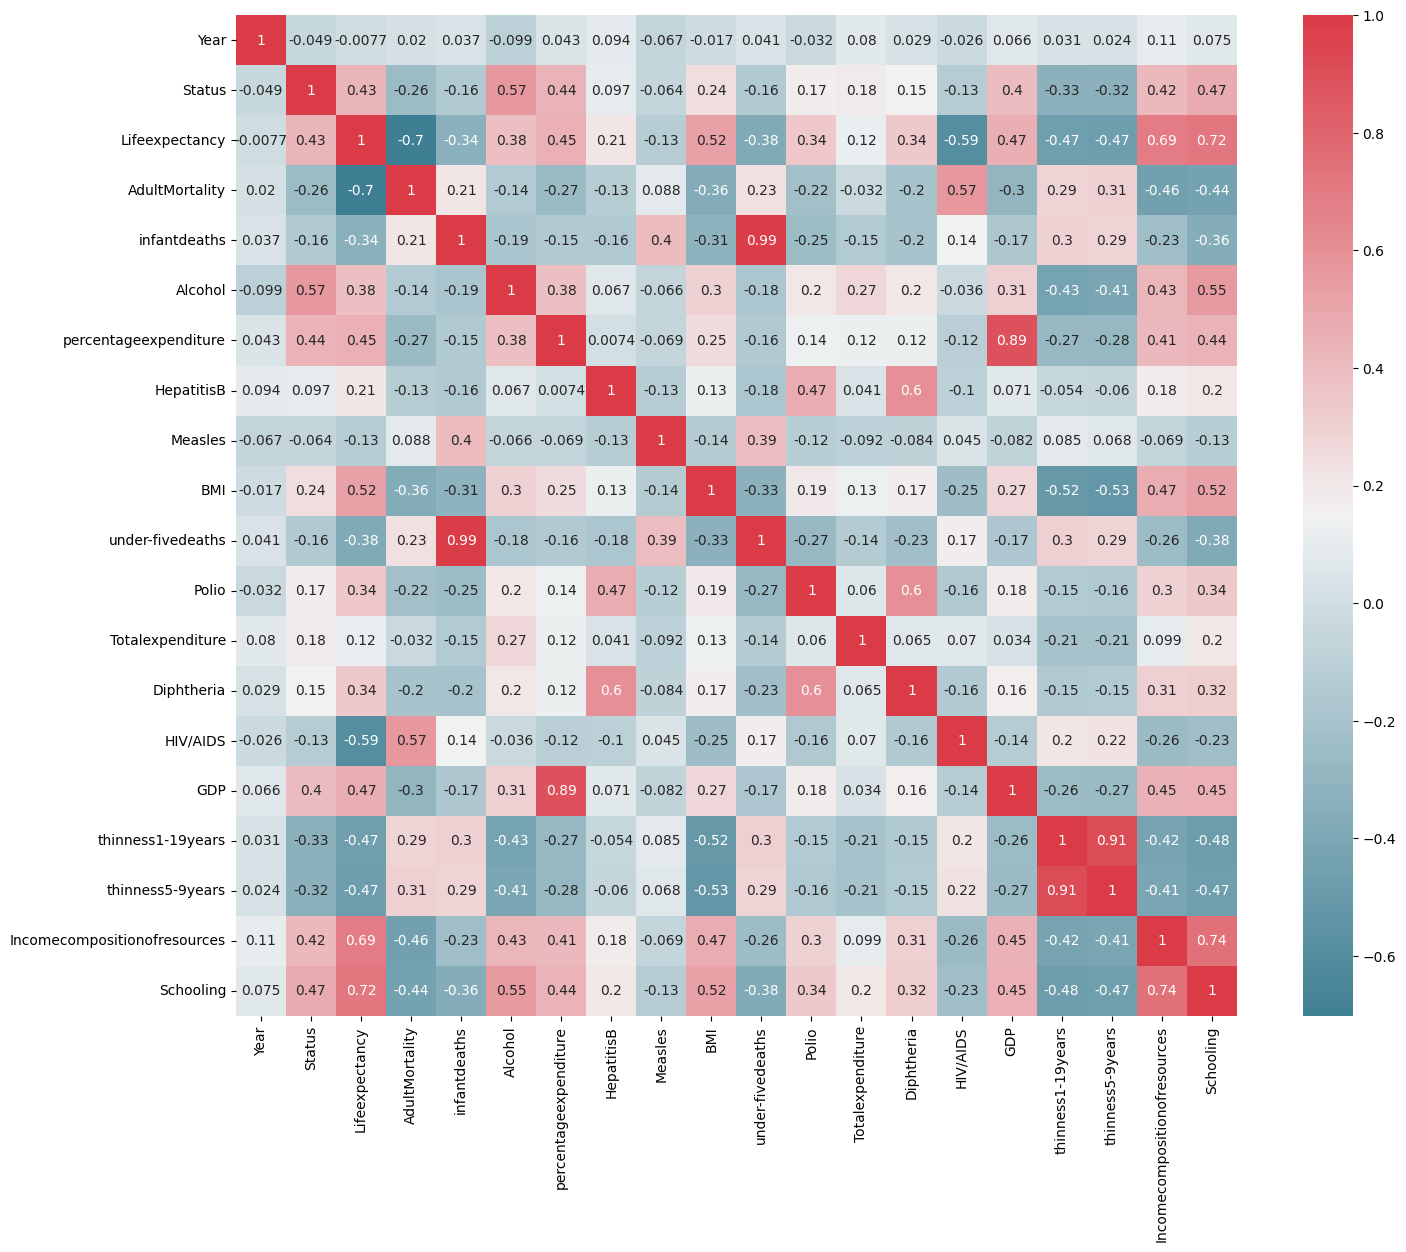

In [9]:
# Look at the correlations between multiple features by displaying a correlation plot (in heatmap form)
import seaborn as sns
# Visualize correlations
f, ax = plt.subplots(figsize=(17, 13))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

# Formulate a few conclusions based on this plot.
# Which features have a strong correlation with Lifeexpactancy
# Which features are strongly correlated between each other

# If you had to remove a few features, which ones would you choose and why?

In [10]:
# Also take a look at the pairplot between features. (Takes some time to generate)
# sns.pairplot(data);

#Formulate a few conclusions based on this plot

In [11]:
# Split the data into features and targets
X = data.drop("Lifeexpectancy",axis=1) # Don't use inplace = True here! 
y = data["Lifeexpectancy"]
X
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
Name: Lifeexpectancy, Length: 1776, dtype: float64

In [12]:
# Create dummy columns for the Year column
# This because we would like the Year column to be treated as a categorical column
# Take a look at https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
# Specify the year column with columns=["Year"] parameter
X = pd.get_dummies(X,columns=["Year"])

In [13]:
# Take a look at the first rows of the features df
X.head()

,Status,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,False,False,False,False,False,False,False,False,False,True
1,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,False,False,False,False,False,False,False,False,True,False
2,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,False,False,False,False,False,False,False,True,False,False
3,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,False,False,False,False,False,False,True,False,False,False
4,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,False,False,False,False,False,True,False,False,False,False


In [14]:
# Split the data into a training and a test set
# Take about 20% of the data as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [15]:
# Create a linear regression model and fit the data
lregmodel=LinearRegression()
lregmodel.fit(X_train,y_train)

print(f"Coefficients: {(coef := lregmodel.coef_)}")
print(f"Intercept: {(intercept := lregmodel.intercept_)}")

Coefficients: [ 1.15106659e+00 -1.57696257e-02  1.52077464e-01  5.21844331e-03
  4.66740064e-04 -1.42523701e-03 -3.02312837e-05  2.41038334e-02
 -1.20044264e-01  9.44631619e-03  8.40108567e-02  1.19395024e-02
 -6.26229145e-01  2.95114786e-05 -9.36641160e-03 -9.99690840e-02
  7.03272213e+00  6.67065439e-01  2.01727354e-01  7.10500490e-01
  2.17351668e-01  1.70739825e-01  3.02218383e-01 -7.87443014e-02
  1.98110323e-01 -3.47502016e-01 -3.66790267e-01 -1.17594729e-01
 -4.88778063e-01 -5.44564815e-01 -6.84594760e-01 -7.39267040e-01
 -4.10258447e-01  1.97744640e+00]
Intercept: 57.911564711738926


In [16]:
# Predict new values for the test set
# print(X_test)
Lifeexpectancy = lregmodel.predict(X_test)
print(Lifeexpectancy)

[76.8502341  60.54030732 72.24373439 74.81372069 71.48697566 70.51123617
 79.61100619 49.09227132 83.18929531 73.41515568 82.74051597 77.47923134
 75.58126131 68.81339162 76.69291682 72.48620625 60.65042814 79.39920628
 62.47762472 70.96613053 75.01825407 58.96797626 74.36215979 61.62339536
 76.82185457 74.59539559 60.71916413 73.25646383 64.02334408 67.79460326
 73.50906072 71.88711543 74.38177873 64.97088508 67.61108393 70.37642954
 77.83822483 70.73175202 74.90472695 58.3762155  75.66579112 71.76942737
 68.26374888 57.76964924 74.11624996 76.05857219 67.83163465 75.0036289
 46.12056492 66.23061911 72.18423724 65.69533456 57.82321906 64.74446993
 55.81988989 72.78473675 77.54230743 62.70971009 59.84459089 45.51266856
 70.28321973 78.44873151 81.45227332 82.41675361 72.28253025 59.52399733
 74.00446233 69.39325034 67.86469357 72.77238297 72.89943115 73.66118194
 61.20639601 37.32352422 58.00432688 77.0034675  61.85468986 76.73667625
 74.22571289 70.62136514 79.29986063 78.39462751 68.

In [17]:
# Evaluate the model using mean absolute error, mean squared error, R2
# Check to see if you have under- or overfitting by also calculating these scores for the training set
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f"MAE: {mean_absolute_error(y_test,Lifeexpectancy)}")
print(f"MSE: {mean_squared_error(y_test,Lifeexpectancy)}")
print(f"R2 : {r2_score(y_test,Lifeexpectancy)}")
print("\nChecking for the trainingset also:")
print(f"MAE: {mean_absolute_error(y_train,lregmodel.predict(X_train))}")
print(f"MSE: {mean_squared_error(y_train,lregmodel.predict(X_train))}")
print(f"R2 : {r2_score(y_train,lregmodel.predict(X_train))}")

# Formulate a conclusion based on this model, is this a good model, over or underfitted?
# Balanced model. Linear regression model is the best possible model for it's type, so changing parameters is not really an option, but you can modify the data here a bit. 
# If you want to change many paramaters, use another type of model 

MAE: 2.8570114390437293
MSE: 13.095950828762303
R2 : 0.8017020549077595

Checking for the trainingset also:
MAE: 2.628550466546668
MSE: 12.125853645788968
R2 : 0.8186536483927563


## Model optimalisation
Until now we did not do any optimizations like normalization or regularization.

Try different regularization techniques (Ridge/Lasso), play also with the alpha levels of the model.

In [ ]:
# Try different possibilities yourself
from sklearn.linear_model import Lasso,Ridge
from ipywidgets import interact,widgets 

# First order


In [ ]:
# L1 linear regression = Lasso
print("L1 (Lasso)")


In [ ]:
# L2 linear regression = Ridge
print("L2 (Ridge)")


### Also try around with higher order features

In [18]:
# Add in some higher order features and train some models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = Ridge(alpha=10)
model.fit(X_train_poly, y_train)

y_pred_test = model.predict(X_test_poly)
y_pred_train = model.predict(X_train_poly)

print(f"MAE: {mean_absolute_error(y_test,y_pred_test)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_test)}")
print(f"R2 : {r2_score(y_test,y_pred_test)}")
print("\nChecking for the trainingset also:")
print(f"MAE: {mean_absolute_error(y_train,y_pred_train)}")
print(f"MSE: {mean_squared_error(y_train,y_pred_train)}")
print(f"R2 : {r2_score(y_train,y_pred_train)}")

MAE: 2.0062134045201714
MSE: 7.637828199331241
R2 : 0.8843485550076631

Checking for the trainingset also:
MAE: 1.4245180228829037
MSE: 3.6920530277222547
R2 : 0.9447840650171112
